<a href="https://colab.research.google.com/github/edu-vasconcelos/Analizing-data-airbnb/blob/main/Airbnb_Data_NYC_part2v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<CENTER> PARTE 2 - Analyzing Airbnb data for New York City**

#Restaurando os pacotes utilizados

In [14]:
# Pacotes Utilizados
!pip install cartopy
!pip install folium
!pip install folium --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
# Pacotes Utilizados
import pandas as pd
import matplotlib.pyplot as plt
import folium as folium
from folium.plugins import HeatMap
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from folium.plugins import FastMarkerCluster
import matplotlib.ticker as mtick
import plotly.express as px

In [16]:
#Restaurando o dataset da parte 1
df_clean = pd.read_csv("/content/df_clean.csv")

# **6. Analisando os valores das hospedagens**


Nesta seção realizaremos algumas análises em cima dos valores das hospedagens da cidade de Nova York. Para isso, utilizaremos as seguintes variáveis 'neighbourhood', 'neighbourhood_group', 'room_type', 'price', 'latidute', 'longitude', 
>
>
Começaremos buscando a média geral dos preços para New York e em seguida iremos setorizando esses valores.
Para localizar o preço médio e mediano iremos utilizar as funções `mean()` e `median()`.

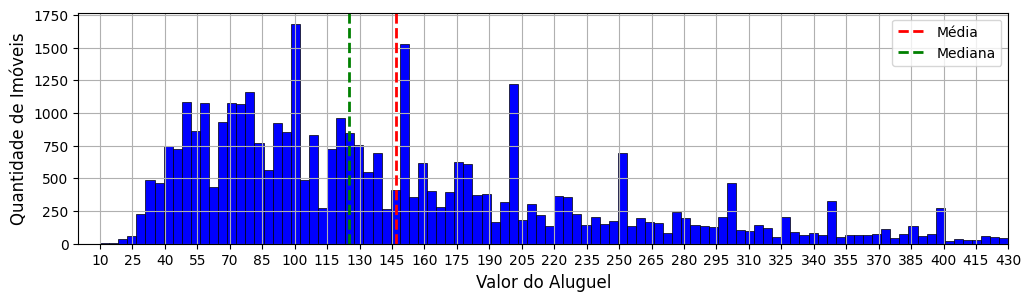


*Valor médio de uma diária em Nova York é de US$ 146.72
*Valor mediano de uma diária em Nova York é de 125.00


In [17]:

# Histograma
df_clean.price.hist(bins=100, figsize=(12, 3), color='blue', edgecolor='black', linewidth=0.5)

# Calculando a média e a mediana
mean = np.mean(df_clean['price'])
median = np.median(df_clean['price'])

# Adicionando as linhas de média e mediana
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)
plt.axvline(median, color='green', linestyle='dashed', linewidth=2)

# Definindo o título e as legendas
plt.ylabel('Quantidade de Imóveis', fontsize=12)
plt.xlabel('Valor do Aluguel', fontsize=12)
plt.xlim(0, 10)
plt.xticks(range(10, 440, 15), fontsize=10)
plt.yticks(fontsize=10)
plt.gca().yaxis.grid(True)
plt.legend(['Média', 'Mediana'], fontsize=10)

plt.show()

print()
print(f"*Valor médio de uma diária em Nova York é de US${mean: .2f}")
print(f"*Valor mediano de uma diária em Nova York é de{median: .2f}")

Com base nos dados apresentados acima podemos verificar que o preço médio para a cidade de Nova York é de 146,72 dolares. 

Agora faremos uma análise mais aprofundada para verifiar o preço médio dos imovéis por região.


### **6.1.Valores por localidade**



Vamos começar verificado a média dos preços por região, utilizando duas variáveis para isso, a primeira será 'neighbourhood', para identificarmos o bairro mais caro e o mais barato e a segunda é 'neighbourhood_group', ou seja, os grupos de bairros que já estão inseridos no dataset para identificarmos quais zonas da cidade são as mais caras em média.

In [18]:
df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)

neighbourhood
Willowbrook           329.000000
Neponsit              293.500000
Financial District    255.639344
Tribeca               239.258065
Theater District      238.410112
                         ...    
Country Club           70.000000
Grant City             63.461538
Hunts Point            62.709677
Bull's Head            60.000000
New Dorp               40.000000
Name: price, Length: 221, dtype: float64

Como podemos ver com o método utilizado, dos 221 bairros listados no dataset, os dois bairros mais caros da cidade de Nova York são ***Willowbrook e Neponsit***, o primeiro com uma média de 329,00 dolares e o segundo com 293.50 dolares, mas antes de aceitarmos que esses são os bairros mais caros da cidade, devemos consultar a quantidade de imoveis anunciados nessas localidades para confirmar se está informação é correspondente de um conjunto de imoveis ou de apenas um unico anúncio.
Para isso iremos localizar todos os anuncios de imóveis que constam dentro destes bairros com a funcão `loc`

In [19]:
count = len(df_clean.loc[(df_clean['neighbourhood'] == 'Willowbrook')])
count2 = len(df_clean.loc[(df_clean['neighbourhood'] == 'Neponsit')])
print(f"Foram encontrados {count} imovél para o bairro de Willowbrook e {count2} para o bairro de Neponsit")

Foram encontrados 1 imovél para o bairro de Willowbrook e 2 para o bairro de Neponsit


Como podemos ver os dois bairros juntos somam 3 anúncios. Devido a este fato, essas regiões com poucos imóveis e com um valor de diária alto, criam uma distorção dentro da classificação.
Para não corremos esse risco, vamos verificar a distribuição do número de anúncios por bairro dentro do nosso dataset.



In [20]:
# Ordenar o dataset por bairro e quantidade de anúncio
df_sorted = df_clean.sort_values(by=['neighbourhood', 'id'])

# Contar o número de anúncios em cada bairro e número de anúncio
count_by_neighbourhood = df_sorted.groupby(['neighbourhood'])['host_id'].count()

# Calcular o percentual do número de anúncios por bairro
num_bairros = len(count_by_neighbourhood)
percentiles = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

# Variável para armazenar o número total de anúncios cumulativos em cada faixa
total_imoveis_por_faixa = []

for p in percentiles:
    cutoff = int(num_bairros * p)
    num_imoveis = count_by_neighbourhood.nsmallest(cutoff).max()
    bairros_min = count_by_neighbourhood[count_by_neighbourhood <= num_imoveis].index.tolist()
  
    # Soma o número de anúncios de cada bairro
    total_imoveis = count_by_neighbourhood[count_by_neighbourhood <= num_imoveis].sum()
    total_imoveis_por_faixa.append(total_imoveis)
  
    print("{:.0%} dos bairros têm menos de {} anuncios - Total de Bairros é de {} e o total anúncios é de {} até essa faixa".format(p, num_imoveis, len(bairros_min), total_imoveis)),
print()
# Imprimir o número total de bairros
print("Existem", num_bairros, "bairros no dataset.")



5% dos bairros têm menos de 2 anuncios - Total de Bairros é de 11 e o total anúncios é de 17 até essa faixa
10% dos bairros têm menos de 4 anuncios - Total de Bairros é de 23 e o total anúncios é de 60 até essa faixa
15% dos bairros têm menos de 6 anuncios - Total de Bairros é de 34 e o total anúncios é de 122 até essa faixa
20% dos bairros têm menos de 8 anuncios - Total de Bairros é de 44 e o total anúncios é de 196 até essa faixa
25% dos bairros têm menos de 13 anuncios - Total de Bairros é de 57 e o total anúncios é de 336 até essa faixa
30% dos bairros têm menos de 17 anuncios - Total de Bairros é de 70 e o total anúncios é de 541 até essa faixa
35% dos bairros têm menos de 20 anuncios - Total de Bairros é de 77 e o total anúncios é de 678 até essa faixa
40% dos bairros têm menos de 28 anuncios - Total de Bairros é de 89 e o total anúncios é de 978 até essa faixa
45% dos bairros têm menos de 33 anuncios - Total de Bairros é de 100 e o total anúncios é de 1322 até essa faixa
50% do

Como podemos ver 25% dos bairros têm menos de 13 anúncios, isso corresponde a 122 anúncios do nosso dataset. Deste modo, para montarmos o nosso ranking dos bairros mais caros e mais baratos iremos desconsiderar os bairros com menos de 13 anúncios como forma de garantir que os resultados sejam estatisticamente significativos. Para isso agruparemos os bairros usando a função `groupby`, para obter a quantidade de anúncios de hospedagens para cada bairro e criaremos um filtro para desconsidermos apenas os bairros com mais de 13 anúncios utilizando a função `filter`.
>
Paralelo a isso, iremos executar o mesmo raciocínio citado acima, porem considerando como filtro apenas os bairros com mais de 40 imóveis anúnciados, esse número equivale a 50% dos bairros do nosso dataset, a assim poderemos compara-lós e então afirmar quais são os 5 bairros mais caros.

In [21]:
# Contando o número de anúncios por bairro
counts = df_clean['neighbourhood'].value_counts(normalize=True, ascending=False)

# Agrupando os bairros com pelo menos 13 anúncios e calculando as estatísticas de preço
result = df_clean.groupby('neighbourhood').filter(lambda x: len(x) >= 13).groupby('neighbourhood')['price'].agg(['median', 'mean', 'max', 'min', 'size'])

# Juntando a porcentagem de anúncios por bairro com as estatísticas de preço
result = result.join(counts.rename('percentage'))

# Renomeando as colunas das estatísticas de preço e porcentagem de anúncios
result.columns = ['Valor Mediano', 'Valor Médio', 'Maior Valor', 'Menor Valor', 'Qts de Hospedagens', '% de Hospedagens em relação ao total']

# Ordenando os resultados por valor médio e mediano em ordem decrescente - Mais Caros
result_sorted = result.sort_values(by=['Valor Médio', 'Valor Mediano'], ascending=False)

# Ordenando os resultados por valor médio e mediano em ordem crescente - Mais Baratos
result_sorted2 = result.sort_values(by=['Valor Médio', 'Valor Mediano'], ascending=True)

#Exibindo as tabelas
print('Bairros Mais Caros')
display(result_sorted.head(5))
print()
print('Bairros Mais Baratos')
display(result_sorted2.head(5))

Bairros Mais Caros


,Valor Mediano,Valor Médio,Maior Valor,Menor Valor,Qts de Hospedagens,% de Hospedagens em relação ao total
neighbourhood,,,,,,
Financial District,250.0,255.639344,429,35,427,0.011408
Tribeca,227.0,239.258065,402,42,93,0.002485
Theater District,250.0,238.410112,408,44,178,0.004756
Midtown,219.0,225.233708,430,44,1335,0.035667
West Village,202.0,219.848341,426,59,422,0.011274



Bairros Mais Baratos


,Valor Mediano,Valor Médio,Maior Valor,Menor Valor,Qts de Hospedagens,% de Hospedagens em relação ao total
neighbourhood,,,,,,
Hunts Point,50.0,62.709677,130,35,31,0.000828
Grant City,39.0,63.461538,131,33,13,0.000347
Woodside,44.0,76.179272,429,10,357,0.009538
West Brighton,60.0,77.740741,200,30,27,0.000721
Elmhurst,61.0,83.665468,420,20,278,0.007427


In [22]:
# Contando o número de anúncios por bairro
counts = df_clean['neighbourhood'].value_counts(normalize=True, ascending=False)

# Agrupando os bairros com pelo menos 40 anúncios e calculando as estatísticas de preço
result = df_clean.groupby('neighbourhood').filter(lambda x: len(x) >= 40).groupby('neighbourhood')['price'].agg(['median', 'mean', 'max', 'min', 'size'])

# Juntando a porcentagem de anúncios por bairro com as estatísticas de preço
result = result.join(counts.rename('percentage'))

# Renomeando as colunas das estatísticas de preço e porcentagem de anúncios
result.columns = ['Valor Mediano', 'Valor Médio', 'Maior Valor', 'Menor Valor', 'Qts de Hospedagens', '% de Hospedagens em relação ao total']

# Ordenando os resultados por valor médio e mediano em ordem decrescente
result_sorted = result.sort_values(by=['Valor Médio', 'Valor Mediano'], ascending=False)
result_sorted.head(5)

,Valor Mediano,Valor Médio,Maior Valor,Menor Valor,Qts de Hospedagens,% de Hospedagens em relação ao total
neighbourhood,,,,,,
Financial District,250.0,255.639344,429,35,427,0.011408
Tribeca,227.0,239.258065,402,42,93,0.002485
Theater District,250.0,238.410112,408,44,178,0.004756
Midtown,219.0,225.233708,430,44,1335,0.035667
West Village,202.0,219.848341,426,59,422,0.011274


Conforme apresentado acima, agora podemos afirmar que os 5 bairros mais caros, em média, são o Financial District com US255.64, Tribeca com US239.26, Theater District US238.41, Midtown US225.23 e West Village US219.85, com valores 35% maior do que a média geral da cidade.
Esses bairros se repetiram nos primeiros lugares nos dois cenários desenhados, ou seja, indiferente a base considerada (exluindo 25% ou 50% dos anúncios) eles se mantiveram nas primeira colocações.
>
Os bairros Financial District, Tribeca, Theater District, Midtown e West Village são alguns dos mais caros em média no Airbnb em Nova York devido a sua localização privilegiada e aos atrativos turísticos e culturais que oferecem.
>
O Financial District é conhecido por ser o centro financeiro da cidade e abriga muitas das principais empresas e bancos do mundo, além de atrações como o Memorial e Museu do 11 de Setembro e a famosa Estátua da Liberdade.
>
Tribeca é uma área que já foi predominantemente industrial e que hoje abriga muitos lofts e apartamentos de luxo, além de ser conhecida por sua cena gastronômica diversificada e suas galerias de arte.
>
O Theater District é famoso por seus musicais da Broadway e teatros, bem como seus restaurantes e vida noturna animada.
>
Midtown é uma das áreas mais movimentadas e turísticas de Nova York, com pontos de interesse como a Times Square, o Rockefeller Center e a Quinta Avenida, além de uma grande variedade de lojas, restaurantes e hotéis.
>
Por fim, o West Village é conhecido por seu charme boêmio, com ruas arborizadas, cafés, bistrôs e lojas elegantes, além de ter sido o lar de muitas personalidades famosas ao longo dos anos.
>
Esses bairros são considerados áreas nobres e prestigiadas em Nova York, o que, juntamente com sua oferta de atrativos turísticos e culturais, resulta em preços mais elevados para acomodações no Airbnb.
>
Já os bairros mais baratos são o Hunts Point com US62.71, Grant City com US63.46, Woodside US76.18, West Brighton com US77.74 e Elmhurst com US83.67.
>
Esses bairros provavelmente são mais baratos em Nova York devido a diversos fatores, como a localização, nível de desenvolvimento, transporte público, oferta de comércio e serviços, entre outros. Além disso, alguns desses bairros podem ter uma reputação negativa ou serem menos populares entre os turistas, o que pode influenciar nos preços mais baixos no Airbnb. No entanto, é importante ressaltar que cada bairro possui suas próprias características e motivos específicos para serem mais ou menos caros.
>
>
>
Agora vejamos de qual distrito esses bairros pertencem.


In [23]:
print("Bairros mais caros:")
print()
bairros_high = ["Financial District", "Tribeca", "Theater District", "Midtown", "West Village"]

distritos_high= df_clean[df_clean["neighbourhood"].isin(bairros_high)][["neighbourhood", "neighbourhood_group"]].drop_duplicates()

for index, row in distritos_high.iterrows():
    print(row["neighbourhood"], "-", row["neighbourhood_group"])
print()
print("Bairros mais baratos:")
print()
bairros_low = ["Hunts Point", "Grant City", "Woodside", "West Brighton", "Elmhurst"]

distritos_low = df_clean[df_clean["neighbourhood"].isin(bairros_low)][["neighbourhood", "neighbourhood_group"]].drop_duplicates()

for index, row in distritos_low.iterrows():
    print(row["neighbourhood"], "-", row["neighbourhood_group"])


Bairros mais caros:

Midtown - Manhattan
West Village - Manhattan
Tribeca - Manhattan
Theater District - Manhattan
Financial District - Manhattan

Bairros mais baratos:

Woodside - Queens
Elmhurst - Queens
West Brighton - Staten Island
Hunts Point - Bronx
Grant City - Staten Island


Podemos ver que todos os bairros mais caros encontram-se no distrito de Manhattan, isso se da por conta de sua localização privilegiada e sua proximidade com diversas atrações turísticas da cidade, como museus, teatros, restaurantes, parques e outras opções de lazer. Além disso, a região conta com uma grande quantidade de opções de transporte público, o que facilita o deslocamento dos turistas pela cidade. Tudo isso faz com que os bairros de Manhattan sejam mais procurados e, consequentemente, com valores mais elevados para a hospedagem no Airbnb.
>
Os distritos do Queens, Staten Island e Bronx geralmente são considerados mais baratos em comparação com Manhattan e outras áreas de Nova York devido a vários fatores, incluindo menor densidade populacional, menor demanda por imóveis e distâncias maiores dos principais centros comerciais e financeiros da cidade. Além disso, esses bairros têm menos atrações turísticas e menos opções de vida noturna em comparação com Manhattan, o que pode afetar os preços dos imóveis no mercado de aluguel do Airbnb.
>
Vamos verificar qual é a média de valores por distrito.

In [24]:
# Agrupando por distrito e calculando a média dos preços
imoveis_por_distrito = df_clean.groupby("neighbourhood_group").agg({"price": ["mean"]})

# Renomear a coluna de valores médios e redefinido o índice para o nome do distrito
imoveis_por_distrito.columns = ["Valor Médio"]
imoveis_por_distrito = imoveis_por_distrito.reset_index()

# Ordenar o resultado em ordem decrescente pelo valor médio
imoveis_por_distrito = imoveis_por_distrito.sort_values(by="Valor Médio", ascending=False)

imoveis_por_distrito

,neighbourhood_group,Valor Médio
2,Manhattan,176.258208
1,Brooklyn,136.229485
4,Staten Island,116.571059
3,Queens,113.924435
0,Bronx,108.265896


Como podemos ver, o ranking dos distritos segue na mesma linha dos bairros, com Manhattan em primeiro lugar, seguido por Brooklyn, Staten Island, Queens e, por último, Bronx. A partir dos dados acima, podemos confirmar que os bairros mais caros e baratos pertencem aos distritos mais caros e mais baratos, respectivamente, seguindo o mesmo padrão. Outra informação importante que podemos retirar dessa análise é que os dois distritos mais caros também possuem a maior quantidade de anúncios de hospedagens disponíveis, somando quase 80% de todas as hospedagens de Nova York.
>
Para finalizar a análise de valores por região, iremos plotar um `heatMap` para termos uma noção espacial da localização desses imóveis e uma mapa interativo para que possamos selecionar por faixa de preço, bairro e distrito. Para o `heatMap`, usaremos um filtro de quantidade mínima de anúncios por bairro no gráfico (mantendo o estipulado nos testes acima). Antes de calcular as coordenadas e preços médios dos bairros, usaremos a função `groupby` com `filter` para aplicar esse filtro.
Já o mapa interativo utilizará a funcão `Dropdown` para criar os controles interativos, a função `FastMarkerCluster` para criar grupos de marcadores no mapa para melhorar a performance do carregamento e renderização pois temos muitos marcadores e a função `interactive` para criar widgets interativos no  que permitam a seleção e alteração dos valores de entrada para atualização do output





In [25]:
#coordenadas do centro do mapa
lat, lon = 40.7128, -74.0060

# O mapa com base nas coordenadas do centro
ny_heatmap = folium.Map(location=[lat, lon], zoom_start=10)

# obter as coordenadas e preços médios dos bairros com pelo menos 13 anúncios
result = df_clean.groupby('neighbourhood').filter(lambda x: len(x) >= 13)
result = result.groupby('neighbourhood')[['latitude', 'longitude', 'price']].mean().reset_index()

# plotar o heatmap com base nas coordenadas e preços médios dos bairros
HeatMap(data=result[['latitude', 'longitude', 'price']], 
        name='heatmap', 
        min_opacity=0.4, 
        radius=15, 
        blur=6, 
        max_zoom=15, 
        gradient={0.8: 'blue', 0.4: 'purple', 0.8: 'orange', 1: 'red'}).add_to(ny_heatmap)

ny_heatmap


In [39]:
# criando controles interativos para selecionar bairro, distrito e faixa de preço
neighbourhood_dropdown = widgets.Dropdown(
    options=['Todos'] + df_clean['neighbourhood'].unique().tolist(),
    value='Todos',
    description='Bairro:'
)

neighbourhood_group_dropdown = widgets.Dropdown(
    options=['Todos'] + df_clean['neighbourhood_group'].unique().tolist(),
    value='Todos',
    description='Distrito:'
)

price_range_dropdown = widgets.Dropdown(
    options=['Todos', '0-100', '101-200', '201-300', '>300'],
    value='Todos',
    description='Faixa de preço:'
)

def update_map(neighbourhood, neighbourhood_group, price_range):
    # filtrar os dados com base nas seleções
    if neighbourhood == 'Todos' and neighbourhood_group == 'Todos' and price_range == 'Todos':
        filtered_df = df_clean.copy()
    else:
        filtered_df = df_clean.copy()
        if neighbourhood != 'Todos':
            filtered_df = filtered_df[filtered_df['neighbourhood'] == neighbourhood]
        if neighbourhood_group != 'Todos':
            filtered_df = filtered_df[filtered_df['neighbourhood_group'] == neighbourhood_group]
        if price_range != 'Todos':
            if price_range == '0-100':
                filtered_df = filtered_df[filtered_df['price'] <= 100]
            elif price_range == '101-200':
                filtered_df = filtered_df[(filtered_df['price'] > 100) & (filtered_df['price'] <= 200)]
            elif price_range == '201-300':
                filtered_df = filtered_df[(filtered_df['price'] > 200) & (filtered_df['price'] <= 300)]
            else:
                filtered_df = filtered_df[filtered_df['price'] > 300]

    # obter as coordenadas médias do bairro selecionado
    if len(filtered_df) > 0:
        lat, lon = filtered_df[['latitude', 'longitude']].mean()

        # criar o mapa com base nas coordenadas médias
        ny_map = folium.Map(location=[lat, lon], zoom_start=9)

        # adicionar cluster de marcadores para cada hospedagem no bairro selecionado
        marker_cluster = FastMarkerCluster(data=filtered_df[['latitude', 'longitude']].values)
        ny_map.add_child(marker_cluster)

        # adicionar controle de camadas para permitir que o usuário escolha quantos marcadores são exibidos
        layer_control = folium.LayerControl()
        layer_control.add_to(ny_map)

        # mostrar o mapa atualizado
        display(ny_map)
    else:
        print('Nenhum resultado encontrado para as seleções.')

# criar a interface interativa
widgets.interactive(
    update_map,
    neighbourhood=neighbourhood_dropdown,
    neighbourhood_group=neighbourhood_group_dropdown,
    price_range=price_range_dropdown
)

interactive(children=(Dropdown(description='Bairro:', options=('Todos', 'Sunset Park', 'Upper West Side', 'Bed…

# **7. Tipo de hospedagem mais alugada no Airbnb**

Agora vamo análissar os dados da variável **room_type** onde temos o tipo de hospedagem que está disponibilizado no Airbnb.

Dentro do nosso dataset temos opções de apartamentos ou casas inteiras, aluguel de um quarto, quarto de hotel e quarto compartilhado.

Primeiramente vamos analisar os tipos de hospedagens a serem alugados com seus valores únicos com a função `unique`, depois contar para verificar a quantitade de ocorrências em cada tipo de hospedagem.

In [27]:
df_clean.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [28]:
# Quantidade de cada tipo de imóvel disponível
print(df_clean.room_type.value_counts())
print()
# Percentual de cada tipo de imóvel disponível
print((df_clean.room_type.value_counts() / df_clean.shape[0] * 100).apply(lambda x: f'{x:.2f}%'))


Entire home/apt    20926
Private room       15916
Shared room          499
Hotel room            89
Name: room_type, dtype: int64

Entire home/apt    55.91%
Private room       42.52%
Shared room         1.33%
Hotel room          0.24%
Name: room_type, dtype: object


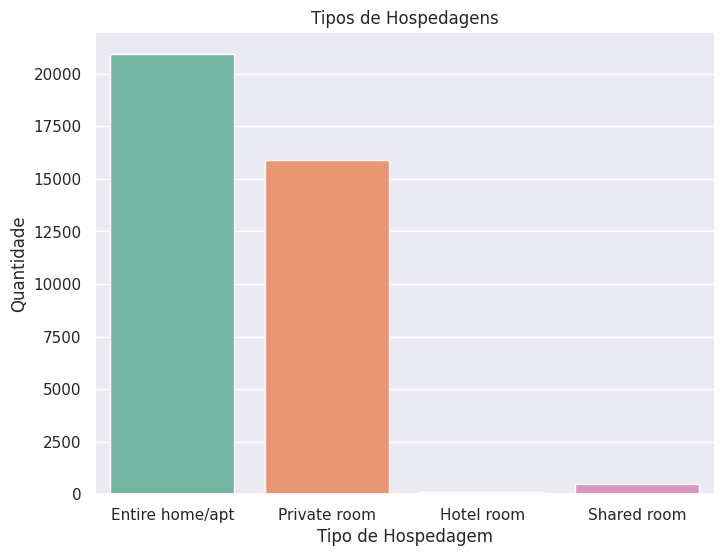

In [29]:
# Criando um gráfico de barras
sns.set(style='darkgrid')
plt.figure(figsize=(8,6))
sns.countplot(x='room_type', data=df_clean, palette='Set2')

# Definindo o título e o label dos eixos
plt.title('Tipos de Hospedagens')
plt.xlabel('Tipo de Hospedagem')
plt.ylabel('Quantidade')

# Mostrando o gráfico
plt.show()


Com base nos dados acima, temos 4 tipos de anúncios e suas respectivas disponibilidades:

* Entire home/apt - 20.926 unidades - 55.91% dos anúncios
* Private room - 15.916 unidades - 42,52% dos anúncios
* Shared room - 499 - 1,33% dos anúncios
* Hotel room - 89 - 0,24% dos anúncios
>
Com isso, podemos concluir que o imóvel mais anúnciado é do tipo Entire home/apt.
>

Agora vamos verificar a quantidade de cada tipo de anúncio por distrito.
Para isso vamos criar uma tabela utilizando a função `pivot_table` e a função `count` para fazer a contagem de cada entrada.



In [30]:
print('Tabela 1: Números de anúncios por distrito')
# Crie uma tabela pivô usando o método 
pivoted = pd.pivot_table(df_clean, values='host_name', index='neighbourhood_group', columns='room_type', aggfunc='count')

# Substituindo valores NaN por 0
pivoted = pivoted.fillna(0)

# Renomeando as colunas
pivoted = pivoted.rename(columns={
    'Entire home/apt': 'Home/apt',
    'Private room': 'Private room',
    'Shared room': 'Shared room',
    'Hotel room': 'Hotel room'
})

# Adicionando uma coluna com o total de cada linha
pivoted = pivoted.assign(Total=pivoted.sum(axis=1))

#Ordenando por ordem decresente
pivoted = pivoted.sort_values(by='Total', ascending=False)

# Adicionando uma linha com o total de cada coluna
totalizador = pd.DataFrame(pivoted.sum(numeric_only=True), columns=['Total']).T
pivoted = pd.concat([pivoted, totalizador])

# formatar os valores da tabela
pivoted_formated = pivoted.applymap(lambda x: '{:,.0f}'.format(x))

# Imprima a tabela pivô resultante

pivoted_formated


Tabela 1: Números de anúncios por distrito


room_type,Home/apt,Hotel room,Private room,Shared room,Total
Brooklyn,"8,018",5,"6,435",153,"14,611"
Manhattan,"9,191",76,"5,123",199,"14,589"
Queens,"2,791",8,"3,384",103,"6,286"
Bronx,699,0,817,41,"1,557"
Staten Island,227,0,157,3,387
Total,"20,926",89,"15,916",499,"37,430"


Conforme tabela acima, os distritos com maior quantidade de anúncios são o Brooklyn em primeiro lugar e Manhattan, com apenas 22 anúncios a menos, em segundo lugar.
Uma informação interessante que podemos verificar nesta tabela é que a soma dos três últimos  distritos (Queens, Bronx e Staten Island) um pouco mais do que a metade de anúncios do segundo colocado. 
>
Com base nesses dados, fica evidente que os distritos do Brookyn e Manhattan são os mais procurados para hospedagem na cidade de Nova York.

# **8. Verificando o mínimo de noites para aluguel.**


Nesta seção iremos analisar os dados de estadia minima exigida por cada anúncio. Conforme comentamos na introdução deste documento a cidade de Nova York é uma de muitas cidades dos Estados Unidos que aplicam uma regulamentação para esse tipo de locação. 
>
A regulamentação do Airbnb em Nova York é um assunto bastante debatido na cidade. Em 2010, o governador de Nova York, David Paterson, assinou a Lei de Residência Ocupada Temporariamente, que proibiu a locação de apartamentos por menos de 30 dias, a menos que o proprietário estivesse presente durante toda a estadia do hóspede.

Em 2016, a lei foi atualizada para incluir multas pesadas para anfitriões que violam a lei e para fornecer mais recursos para a aplicação da lei. A lei também incluiu a obrigação de que plataformas de aluguel de curto prazo, como o Airbnb, compartilhem informações sobre os anfitriões com a cidade para ajudar na aplicação da lei.

Além disso, em 2018, o Conselho da Cidade de Nova York aprovou novas regulamentações que exigem que os proprietários que desejam alugar um apartamento por menos de 30 dias se registrem com a cidade e forneçam provas de que o apartamento é uma residência principal. Essas novas regulamentações também incluem multas pesadas para proprietários que violarem as leis e para plataformas de aluguel de curto prazo que permitirem que essas violações ocorram em sua plataforma.

Essas regulamentações foram criadas para proteger os moradores de Nova York de uma possível escassez de moradias a longo prazo, devido à disponibilização de apartamentos inteiros para aluguel de curto prazo. Também ajudam a garantir a segurança e a qualidade dos apartamentos disponíveis para aluguel de curto prazo.

Apesar da regulamentação em Nova York, ainda é possível encontrar anúncios no Airbnb de locações por menos de 30 dias na cidade. Isso ocorre porque nem todos os anfitriões cumprem as regras ou há falhas na fiscalização. Além disso, alguns dos aluguéis disponíveis podem estar em conformidade com as regras, como aqueles em que o anfitrião está presente durante a estadia do hóspede. No entanto, é importante lembrar que alugar um apartamento inteiro por menos de 30 dias em Nova York, sem a presença do anfitrião, é ilegal, e tanto o anfitrião quanto o hóspede podem enfrentar multas significativas se forem pegos. Portanto, é importante estar ciente das regulamentações locais para efeutar as nossas análises.
>
A primeira análise que faremos é a verificação das médias de noites minímas separadas por distrito e em seguida verificaremos os anúncios que cumprem com os requisitos legais da cidade exigindo uma estádia mínima de 30 dias.
Contudo, iremos considerar este quisito apenas para o tipo de residencia "Entire home/apt", partindo do presupusto que as opções Private room, Shared room e Hotel room estão dentro das normas de locação de curto prazo. 
>
>A norma diz que as locações só podem ser de curto prazo (duração inferior a 30 dias) quando: 
* O anfitrião estiver presente na acomodação durante a estadia do hóspede;
* Se a acomodação for um quarto privado em uma casa, apartamento ou condomínio em que o anfitrião reside;
* Se a acomodação for um quarto em uma hospedagem domiciliar (homestay) registrada junto às autoridades locais;
* Se a acomodação for um hotel ou pousada licenciad o proprietário está presente durante toda a estadia).

In [31]:
print('Tabela 2: Média geral de noites mínimas exigidas por tipo de acomodação e distrito')
# Crie uma tabela pivô para contar a média de noites mínimas em cada bairro e tipo de acomodação
pivoted2 = pd.pivot_table(df_clean, values='minimum_nights', index='neighbourhood_group', columns='room_type', aggfunc='mean')

# Adicionando a média geral por tipo de acomodação
pivoted2.loc['Media geral',:] = df_clean.groupby('room_type')['minimum_nights'].mean()

# Renomeando as colunas
pivoted2 = pivoted2.rename(columns={
    'Entire home/apt': 'Home/apt',
    'Private room': 'Private room',
    'Shared room': 'Shared room',
    'Hotel room': 'Hotel room'
})

# Adicionando a média geral por distrito
pivoted2['Media geral'] = df_clean.groupby('neighbourhood_group')['minimum_nights'].mean()

# Substituindo valores NaN por 0
pivoted2 = pivoted2.fillna(0)

#Ordenando por ordem decrescente todas as linhas, exceto a última
pivoted2 = pd.concat([pivoted2.iloc[:-1].sort_values(by='Media geral', ascending=False), pivoted2.iloc[-1:]])

# formatar os valores da tabela
pivoted2_formated = pivoted2.applymap(lambda x: '{:,.1f}'.format(x))

# Imprimir a tabela pivô resultante
pivoted2_formated

Tabela 2: Média geral de noites mínimas exigidas por tipo de acomodação e distrito


room_type,Home/apt,Hotel room,Private room,Shared room,Media geral
neighbourhood_group,,,,,
Manhattan,21.5,6.9,16.6,18.7,19.7
Brooklyn,14.7,7.6,16.6,20.3,15.6
Queens,10.3,4.6,14.7,12.5,12.7
Staten Island,6.9,0.0,13.2,1.0,9.4
Bronx,7.5,0.0,9.9,5.4,8.7
Media geral,16.7,6.7,15.8,16.7,0.0


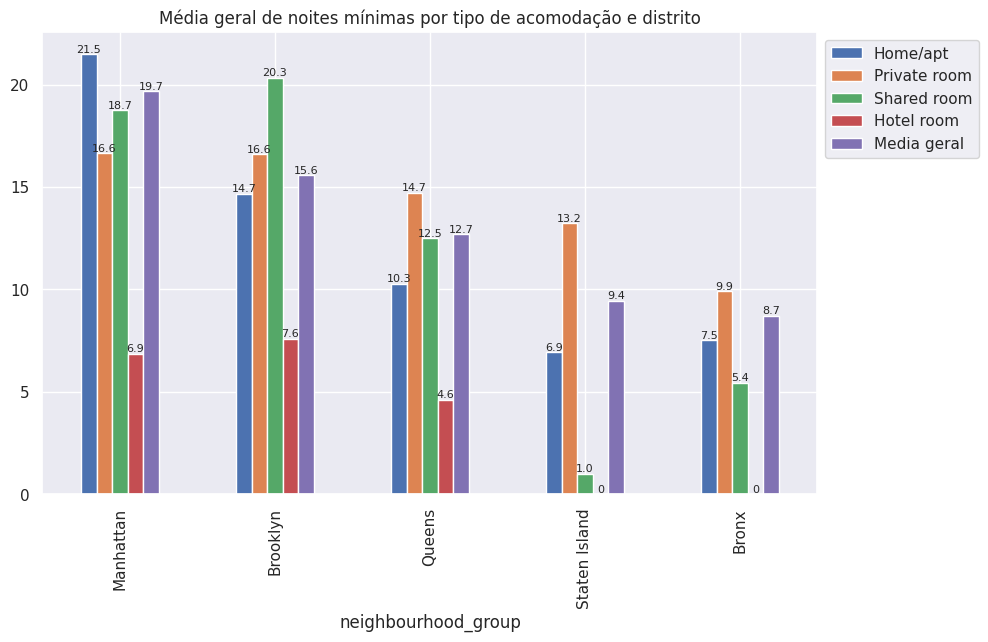

In [32]:
# Criação do gráfico
fig, ax = plt.subplots(figsize=(10,6))

# Seleciona as colunas a serem plotadas (excluindo a última linha)
data = pivoted2[:-1][['Home/apt', 'Private room', 'Shared room', 'Hotel room', 'Media geral']]

# Cria as barras empilhadas
data.plot(kind='bar', ax=ax)

# Adiciona o título
ax.set_title('Média geral de noites mínimas por tipo de acomodação e distrito')

# Adiciona a legenda
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Adiciona os valores acima de cada barra
for i in ax.containers:
    ax.bar_label(i, labels=[f"{j:.1f}" if j > 0 else "0" for j in i.datavalues],
                 label_type='edge', fontsize=8)

# Exibe o gráfico
plt.show()


A tabela e o grafico acima apresentam as médias de noites mínimas de cada tipo de acomodação em cada distrito de Nova York. É possível perceber que as médias variam bastante entre os distritos e tipos de acomodação, sendo que Manhattan apresenta as maiores médias para quase todos os tipos de acomodação, enquanto Staten Island e Bronx apresentam as menores médias. É importante lembrar que a cidade de Nova York possui normas específicas para aluguéis de curta duração, que podem impactar na quantidade de noites mínimas permitidas.

Diante dessas variações, faremos uma análise mais aprofundada dos dados para identificar quais são os percentuais de anúncios que atendem aos requisitos das normas locais em relação ao número mínimo de noites permitidas para cada tipo de acomodação em cada distrito
>
Para isso iremos criar mais uma tabela utilizando a função `pivoted_table` e separar em um outo dataframe apenas os anuncios que exigem 30 noites minimas ou mais.

In [33]:
# Criando um dataframe com os anúncios que têm a quantidade mínima de noites de 30 dias ou mais
df_30nights = df_clean[df_clean['minimum_nights'] >= 30]

print('Tabela 2: Números de anúncios com estadia minima de 30 dias ou mais')
# Crie uma tabela pivô para contar o número de anúncios em cada bairro e tipo de acomodação
pivoted3 = pd.pivot_table(df_30nights, values='id', index='neighbourhood_group', columns='room_type', aggfunc='count')

# Substituindo valores NaN por 0
pivoted3 = pivoted3.fillna(0)

# Renomeando as colunas
pivoted3 = pivoted3.rename(columns={
    'Entire home/apt': 'Home/apt',
    'Private room': 'Private room',
    'Shared room': 'Shared room',
    'Hotel room': 'Hotel room'
})

# Renomeando a coluna "id" para "Número de Anúncios"
pivoted3 = pivoted3.rename(columns={'id': 'Número de Anúncios'})

# Adicionando uma coluna com o total de cada linha
pivoted3 = pivoted3.assign(Total=pivoted3.sum(axis=1))

#Ordenando por ordem decresente
pivoted3 = pivoted3.sort_values(by='Total', ascending=False)

# Adicionando uma linha com o total de cada coluna
totalizador3 = pd.DataFrame(pivoted3.sum(numeric_only=True), columns=['Total']).T
pivoted3 = pd.concat([pivoted3, totalizador3])

# formatar os valores da tabela
pivoted3_formated = pivoted3.applymap(lambda x: '{:,.0f}'.format(x))

# Imprimir a tabela pivô resultante

pivoted3_formated


Tabela 2: Números de anúncios com estadia minima de 30 dias ou mais


room_type,Home/apt,Hotel room,Private room,Shared room,Total
Manhattan,"6,014",14,"2,560",115,"8,703"
Brooklyn,"3,247",1,"3,149",87,"6,484"
Queens,746,1,"1,475",36,"2,258"
Bronx,124,0,208,6,338
Staten Island,30,0,56,0,86
Total,"10,161",16,"7,448",244,"17,869"


Ao analisar a tabela 2 referente ao número de anúncios com estadia mínima de 30 dias ou mais, podemos verificar que:

* Manhattan é a região com o maior número de anúncios dentro dessas condições, com um total de 8.703, seguida por Brooklyn com 6.484 e Queens com 2.258. Bronx e Staten Island possuem o menor número de anúncios, com 338 e 86, respectivamente.

* Brooklyn e Queens apresentam uma proporção maior de quartos privados em relação a Manhattan, que possui mais apartamentos inteiros dentro das condições legais exigidas.

* O número de anúncios dentro das condições legais para locação de curto prazo é significativo nos distritos de Manhattan e Brooklyn. O que nos leva a crer que os bairros mais afastados do centro não respeitam as normas impostas pela cidade, muito provavelmente pela falta de fiscalização.

Em resumo, a tabela 2 mostra que há uma quantidade significante de hospedagens em todas as regiões de Nova York que seguem os reuisitos legais, com destaque para Manhattan como a região com o maior número de anúncios deste tipo. Além disso, o número de anúncios elevado dentro das condições legais demonstra a importância desse tipo de hospedagem para a econimoia da cidade como uma alternativa para os turistas e viajantes a negocios.

In [34]:
print('Tabela 3: Relação percentual ao total dos anúncios com estadia minima de 30 dias ou mais')
# criar uma nova tabela com a divisão dos valores das tabelas pivoted e pivoted3
divided = pivoted3.loc[:, :'Total'].div(pivoted.loc[:, :'Total'])

# Substituindo valores NaN por 0
divided = divided.fillna(0)

#Ordenando por ordem decrescente todas as linhas, exceto a última
divided = pd.concat([divided.iloc[:-1].sort_values(by='Total', ascending=False), divided.iloc[-1:]])

# formatar os valores da tabela em porcentagem
divided2 = divided.applymap(lambda x: '{:.2%}'.format(x))

# imprimir a tabela resultante
divided2

Tabela 3: Relação percentual ao total dos anúncios com estadia minima de 30 dias ou mais


room_type,Home/apt,Hotel room,Private room,Shared room,Total
Manhattan,65.43%,18.42%,49.97%,57.79%,59.65%
Brooklyn,40.50%,20.00%,48.94%,56.86%,44.38%
Queens,26.73%,12.50%,43.59%,34.95%,35.92%
Staten Island,13.22%,0.00%,35.67%,0.00%,22.22%
Bronx,17.74%,0.00%,25.46%,14.63%,21.71%
Total,48.56%,17.98%,46.80%,48.90%,47.74%


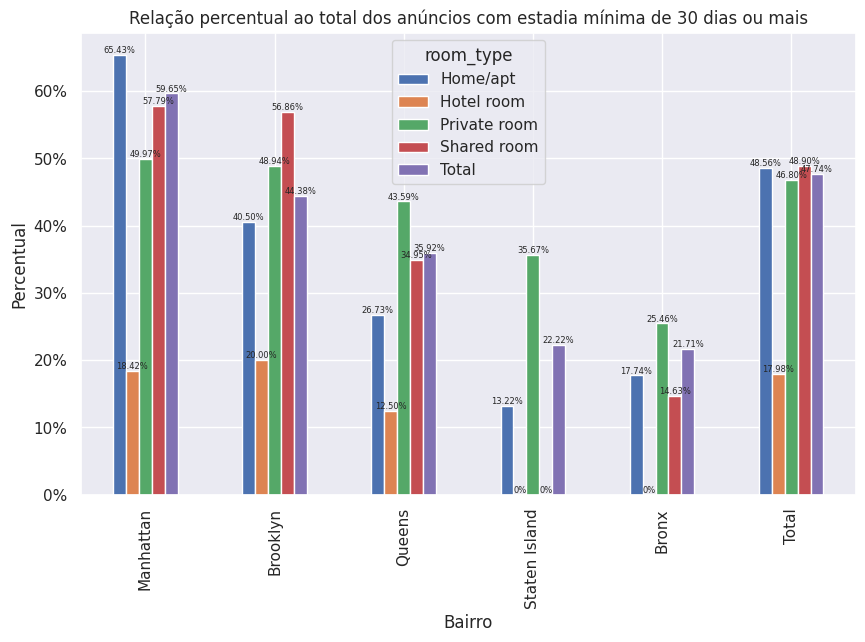

In [35]:
# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))

# Converter os valores para numéricos
divided_numeric = divided2.applymap(lambda x: float(x.strip('%')) / 100)


# Plotar o gráfico de barras
divided_numeric.plot(kind='bar', stacked=False, ax=ax)

# Configurando o título e os labels dos eixos
ax.set_title('Relação percentual ao total dos anúncios com estadia mínima de 30 dias ou mais')
ax.set_xlabel('Bairro')
ax.set_ylabel('Percentual')

# Formatando os valores do eixo y como porcentagem
fmt = mtick.PercentFormatter(xmax=1.0, decimals=0)
ax.yaxis.set_major_formatter(fmt)

# Adicionando os valores acima das barras
for p in ax.containers:
    ax.bar_label(p, label_type='edge', labels=[f'{x*100:.2f}%' if x > 0 else '0%' for x in p.datavalues], fontsize=6)

# Exibindo o gráfico
plt.show()



Como podemos ver na tabela 3 e no gráfico a relação percentual do total de anúncios com estadia mínima de 30 dias ou mais por tipo de quarto e distrito.  Podemos ver que:

* O maior percentual de anúncios com estadia mínima de 30 dias ou mais são os do tipo "Shared_room", representando 48,90% do total de anúncios desta categoria na cidade de Nova York. Os distritos com maior número de anúncios desse tipo são Manhattan com 57,79% logo atrás vem o Brooklyn com 56,86%.

* Os distritos de Manhattan e Brooklyn também são os que mais tem anúncios do tipo 'Home/apt' com 65,43% e 40,50% respectivamente.

* O tipo de quarto menos comum é o "Hotel room", representando apenas 17,98% do total de anúncios, isso ocorre pois a exigencia de estadia minima não se aplica a este tipo de anuncio.

* O Bronx é o distrito com menor número de anúncios em geral e também apresenta os percentuais mais baixos para todos os tipos de quarto.


Podemos ver tambem que 59,65% de todos os anúcios do tipo 'Home/apt' atendem o requisito de estadia minima.Isso pode ser explicado, conforme já mencionamos anteriormente, pelas normas específicas para aluguel de curta duração em Nova York, que aparentemente são mais rigorosas em Manhattan do que em outros bairros. Desde 2019, o Airbnb não permite mais o aluguel de apartamentos inteiros por menos de 30 dias, a menos que o anfitrião esteja presente durante a estadia.
>
Para encerrrarmos este item iremos fazer uma verificação rápida para sabermos se as acomodações que cumprem a exigencia legal tem uma média de preço mais alta ou mais baixa do que as que não atendem.


In [36]:
# Contando o número de anúncios por bairro
counts_30nights = df_30nights['neighbourhood'].value_counts(normalize=True, ascending=False)

# Agrupando os bairros com pelo menos 40 anúncios e calculando as estatísticas de preço
result_30nights = df_30nights.groupby('neighbourhood').filter(lambda x: len(x) >= 40).groupby('neighbourhood')['price'].agg(['median', 'mean', 'max', 'min', 'size'])

# Ordenando os resultados por valor médio e mediano em ordem decrescente - Mais Caros
result_30nights = result_30nights.sort_values(['mean', 'median'], ascending=False)

# Ordenando os resultados por valor médio e mediano em ordem crescente - Mais Baratos
result_30nights_down1 = result_30nights.sort_values(['mean', 'median'], ascending=True)

# selecione os 5 mais caros e os 5 mais baratos para cada dataframe
mais_caros_legais = result_30nights.head(5).reset_index()[['neighbourhood', 'mean']]
mais_caros_geral = result_sorted.head(5).reset_index()[['neighbourhood', 'Valor Médio']]
mais_baratos_legais = result_30nights_down1.head(5).reset_index()[['neighbourhood', 'mean']]
mais_baratos_geral = result_sorted2.head(5).reset_index()[['neighbourhood', 'Valor Médio']]

mais_caros_legais = mais_caros_legais.applymap(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)
mais_caros_geral = mais_caros_geral.applymap(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)
mais_baratos_legais = mais_baratos_legais.applymap(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)
mais_baratos_geral = mais_baratos_geral.applymap(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)

# Formatando a tabela
def highlight_cell(value):
    if isinstance(value, str):
        if value.startswith('R$'):
            return 'background-color: yellow'
    return ''

# Bairros mais caros
print('\nBairros mais caros\n')
mais_caros = pd.concat([mais_caros_legais, mais_caros_geral], axis=1)
mais_caros.columns = ['Bairros (legal)', 'Valor Médio (legal)', 'Bairros (geral)', 'Valor Médio (geral)']
mais_caros = mais_caros.style.applymap(highlight_cell, subset=['Bairros (legal)', 'Bairros (geral)'])
mais_caros.set_table_styles([{'selector': 'th', 'props': [('background-color', 'black'), ('color', 'white')]}])
display(mais_caros)
print()

# Bairros mais baratos
print('Bairros mais baratos\n')
mais_baratos = pd.concat([mais_baratos_legais, mais_baratos_geral], axis=1)
mais_baratos.columns = ['Bairros (legal)', 'Valor Médio (legal)', 'Bairros (geral)', 'Valor Médio (geral)']
mais_baratos = mais_baratos.style.applymap(highlight_cell, subset=['Bairros (legal)', 'Bairros (geral)'])
mais_baratos.set_table_styles([{'selector': 'th', 'props': [('background-color', 'black'), ('color', 'white')]}])
display(mais_baratos)



Bairros mais caros



,Bairros (legal),Valor Médio (legal),Bairros (geral),Valor Médio (geral)
0,Theater District,224.39,Financial District,255.64
1,Tribeca,222.00,Tribeca,239.26
2,West Village,204.96,Theater District,238.41
3,Financial District,198.85,Midtown,225.23
4,Midtown,198.46,West Village,219.85



Bairros mais baratos



,Bairros (legal),Valor Médio (legal),Bairros (geral),Valor Médio (geral)
0,Woodside,49.96,Hunts Point,62.71
1,Jackson Heights,57.84,Grant City,63.46
2,Elmhurst,62.55,Woodside,76.18
3,Cypress Hills,67.31,West Brighton,77.74
4,Bay Ridge,70.31,Elmhurst,83.67


In [37]:
# Selecionando os 5 primeiros do dataset result_sorted
top_5_sorted = result_sorted.head(5)
down_5_sorted = result_sorted2.head(5)

# Reindexando o dataframe result_30nights com os índices dos dataframes top_5_sorted e down_5_sorted
top_5_30nights = result_30nights.reindex(top_5_sorted.index)
down_5_30nights = result_30nights.reindex(down_5_sorted.index)

# Calcular a diferença em porcentagem
diff_pct = top_5_sorted['Valor Médio'] / top_5_30nights['mean'] - 1
diff_pct2 = down_5_sorted['Valor Médio'] / down_5_30nights['mean'] - 1
diff_pct = diff_pct.apply(lambda x: '{:.2%}'.format(x))
diff_pct2 = diff_pct2.apply(lambda x: '{:.2%}'.format(x))

# Criando uma nova tabela com os resultados dos Bairros mais CAROS
top_5_table = pd.DataFrame({'Valor Médio (geral)': top_5_sorted['Valor Médio'],
                            'Valor Médio (legal)': top_5_30nights['mean'],
                            'Diferença (%)': diff_pct})
top_5_table = top_5_table.applymap(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)

# Criando uma nova tabela com os resultados obtidos dos Bairros mais Baratos
down_5_table = pd.DataFrame({'Valor Médio (geral)': down_5_sorted['Valor Médio'],
                            'Valor Médio (legal)': down_5_30nights['mean'],
                            'Diferença (%)': diff_pct2})

# Formatando a tabela
def highlight_cell(value):
    if isinstance(value, str):
        if value.startswith('R$'):
            return 'background-color: yellow'
    return ''

# Exibindo a tabela
top_5_table = top_5_table.style.applymap(highlight_cell, subset=['Valor Médio (legal)', 'Valor Médio (geral)'])
top_5_table.set_table_styles([{'selector': 'th', 'props': [('background-color', 'black'), ('color', 'white')]}])
down_5_table = down_5_table.style.applymap(highlight_cell, subset=['Valor Médio (legal)', 'Valor Médio (geral)'])
down_5_table.set_table_styles([{'selector': 'th', 'props': [('background-color', 'black'), ('color', 'white')]}])

print('Bairros Mais Caros')
display(top_5_table)
print()
print('Bairros Mais Baratos')
display(down_5_table)


Bairros Mais Caros


,Valor Médio (geral),Valor Médio (legal),Diferença (%)
neighbourhood,,,
Financial District,255.64,198.85,28.56%
Tribeca,239.26,222.00,7.77%
Theater District,238.41,224.39,6.25%
Midtown,225.23,198.46,13.49%
West Village,219.85,204.96,7.27%



Bairros Mais Baratos


,Valor Médio (geral),Valor Médio (legal),Diferença (%)
neighbourhood,,,
Hunts Point,62.709677,nan,nan%
Grant City,63.461538,nan,nan%
Woodside,76.179272,49.958848,52.48%
West Brighton,77.740741,nan,nan%
Elmhurst,83.665468,62.547945,33.76%


Com base nos dados trazidos nas tabelas acima, podemos tirar algumas conclusões sobre os aluguéis considereando os anúncios que respeitam as regras de noites minimas. Aqui estão algumas observações que podem ser feitas:

Entre os bairros mais caros podemos ver que o top 5 não teve nenhuma mudança significativa, pois os mesmo bairros que estão presentes no ranking geral encontram-se também no ranking de aluguéis que atendem ao requisito de 30 noites mínimas, ocorrendo apenas algumas alterações de posição entre eles.
Em relação aos valores médios, podemos ver que ocorreu uma redução nos valores dos presentes no ranking, ou seja, os anúncios que exigem 30 noites ou mais são ligeiramente mais baratos do que a média geral. Podemos destacar o bairro Financial Distric que teve uma redução de 26% no valor médio dos anúncios.

Já entre os bairros mais baratos houve uma grande mundança nos bairros que estavam no ranking geral, restando no novo ranking apenas 2 bairros sendo eles o Woodside e o Elmhurst. Os bairros West Brighton, Hunts Poin e Grant City deixaram o ranking pois não têm nenhum anúncio que atenda o requisito legal. Eles deram lugar para os bairros Jackson Heights, Cypress Hills e Bay Ridge.
com relação aos valores médios, os bairros que estão presentes nos dois rankings mantiveram o mesmo padrão dos bairros mais caros, tendo uma redução nos valores, porem os 3 novos bairros que entram na lista vieram com valores bem abaixo dos que sairam.

Com isso encerramos nosssa análise em cima da estadia mínima exigida pelo proprietários.

#**9.Verificando a disponibilidade das hospedagens**

Neste tópico veremos a previsão de disponbilidade para os próximos 365 dias dos imóveis anunciados. Usaremos a variável 'availability_365' onde o próprio Airbnb estima o número de noites disponives para cada anúncio. Sendo assim, vamos analisar quais são as regiões que, em média, provavelmente terão mais noites disponiveis.
Para isso, iremos utilizar tambêm a variável 'neigbourhood_group' na função `groupby` juntamente com um gráfico de colunas.

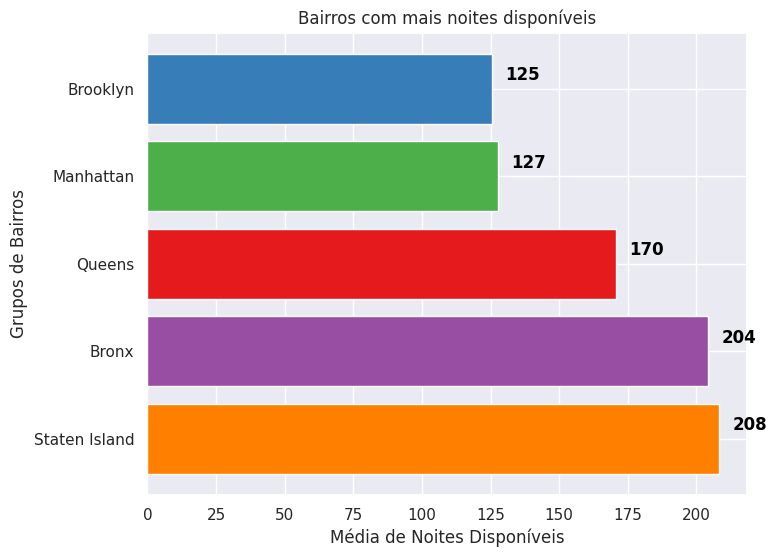

In [38]:
# agrupando por bairro e calculando a média de noites disponiveis
ratings = df_clean.groupby('neighbourhood_group')['availability_365'].mean().sort_values(ascending=True)[:10]

# criando um gráfico
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(y=ratings.index, width=ratings.values, color=['#377eb8', '#4daf4a', '#e41a1c', '#984ea3', '#ff7f00'])

# adicionando o valor numérico de cada barra
for i, v in enumerate(ratings.values):
    ax.text(v + 5, i - 0.1, str(int(v)), color='black', fontweight='bold')

# ajustando o tamanho e o espaçamento das barras
plt.subplots_adjust(left=0.3)
ax.invert_yaxis()

# definindo os rótulos dos eixos e o título do gráfico
ax.set_xlabel('Média de Noites Disponíveis')
ax.set_ylabel('Grupos de Bairros')
ax.set_title('Bairros com mais noites disponíveis')

# exibindo o gráfico
plt.show()



Como podemos ver no gráfico acima os imóveis localizados no Brooklyn e em Manhattan ficaram disponivéis pouco mais de 125 noites, isso demonstra a importancia dessas regiões. Agora se pegarmos os numeros do Bronx e Staten Island, os imóveis passaram mais de 200 dias disponiveis para locação. Isso decorre devido a localização desses imoveis, pois Bronx e Staten Island são regiões mais afastadas do centro e de população mais humilde enquanto Brooklyn e Manhattan são o coração da cidade e assim são os locais mais procurados por turistas e pessoa a negócios.
Esses dados tambÊm nos mostram que Brooklyn e Manhattan são regiões alvo para pessoas que pretendem investir no mercado de alugueis de curto prazo, pois são os locais mais requisitados.

#**Conclusão**


Com base na análise dos dados do Airbnb em Nova York, foi possível identificar a presença de valores ausentes em algumas variáveis, mas que não afetam diretamente a análise realizada, pois o foco foi preço, ocupação, tipo de propriedades, noites mínimas exigidas e região. Além disso, foi possível identificar a presença de alguns outliers em algumas variáveis, como preço, noites mínimas exigidas, número de avaliações e quantidade de imóveis disponíveis para hospedagem. Esses outliers foram tratados no dataset para termos uma visão melhor sem prejudicar a qualidade dos dados.

Ao analisar os valores das hospedagens, foi possível verificar que o preço médio de hospedagem no ano de 2022 para a cidade de Nova York foi de 199,00 dólares, mas também há uma grande quantidade de imóveis na faixa de 50 a 125 dólares. 
A partir da análise setorizada das variáveis 'neighbourhood', 'neighbourhood_group', 'room_type', 'price', 'latitude' e 'longitude', foi possível identificar que as regiões mais caras e com maior taxa de ocupação são Manhattan e Brooklyn, enquanto que Bronxs, Queens e Staten Island são mais acessíveis e tem uma taxa menor de ocupação. Além disso, foi possível verificar que a maioria das propriedades são apartamentos privados e quartos privados, seguidos de apartamentos compartilhados e quartos compartilhados.